# Experiment Results Analysis

This notebook reads a CSV file that contains experimental results. Some columns are simple hyperparameters or metrics, and others are dictionaries (saved as strings) containing evaluation metrics (e.g. "Adversarial Success Rate", "Adversarial Robustness % (Avg Min Perturbation)", and "Adversarial Confidence"). We will:

1. Read the CSV (assuming tab separation).
2. Convert the dictionary columns into Python dictionaries.
3. Extract individual metric values into new DataFrame columns.
4. Create plots with matplotlib and Plotly.

In [9]:
%pip install plotly
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import ast

In [11]:

csv_file = "C:/Users/aless/Repos/Rug/P3/Xai/Distillation_experiments/experiments/cifar_final/experiment_results.csv"

col_names = [
    "Epochs",
    "Learning Rate",
    "Batch Size",
    "Temperature",
    "Num Samples",
    "Accuracy (T)",
    "Mean Gradient Amplitude (T)",
    "Metrics (JSMA)",
    "Metrics (FGSM)",
    "Metrics (DeepFool)",
    "Metrics (Pixel)",
    "Accuracy (S)",
    "Mean Gradient Amplitude (S)",
    "Metrics (JSMA) S",
    "Metrics (FGSM) S",
    "Metrics (DeepFool) S",
    "Metrics (Pixel) S",
]

df = pd.read_csv(csv_file, sep=",", header=0, names=col_names)
df = df.sort_values("Temperature", key=pd.to_numeric)

df.head()


,Epochs,Learning Rate,Batch Size,Temperature,Num Samples,Accuracy (T),Mean Gradient Amplitude (T),Metrics (JSMA),Metrics (FGSM),Metrics (DeepFool),Metrics (Pixel),Accuracy (S),Mean Gradient Amplitude (S),Metrics (JSMA) S,Metrics (FGSM) S,Metrics (DeepFool) S,Metrics (Pixel) S
1,50,0.01,128,1.0,100,68.339998,0.000009,"{'Adversarial Success Rate': 96.0, 'Adversaria...","{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 98.0, 'Adversaria...","{'Adversarial Success Rate': 52.0, 'Adversaria...",56.919998,4.338861e-07,{'Adversarial Success Rate': 94.11111111111111...,"{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 33.0, 'Adversaria..."
14,50,0.01,128,1.0,100,68.339998,0.000009,"{'Adversarial Success Rate': 96.0, 'Adversaria...","{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 98.0, 'Adversaria...","{'Adversarial Success Rate': 52.0, 'Adversaria...",56.919998,4.338861e-07,{'Adversarial Success Rate': 94.11111111111111...,"{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 33.0, 'Adversaria..."
20,50,0.01,128,1.0,100,68.339998,0.000009,{'Adversarial Success Rate': 96.33333333333334...,"{'Adversarial Success Rate': 80.0, 'Adversaria...","{'Adversarial Success Rate': 99.0, 'Adversaria...","{'Adversarial Success Rate': 49.0, 'Adversaria...",59.700000,4.263185e-07,{'Adversarial Success Rate': 95.66666666666667...,"{'Adversarial Success Rate': 73.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 36.0, 'Adversaria..."
13,50,0.01,128,2.0,100,67.930001,0.000014,{'Adversarial Success Rate': 95.22222222222221...,"{'Adversarial Success Rate': 70.0, 'Adversaria...","{'Adversarial Success Rate': 99.0, 'Adversaria...","{'Adversarial Success Rate': 48.0, 'Adversaria...",58.139998,8.601467e-07,{'Adversarial Success Rate': 94.33333333333334...,"{'Adversarial Success Rate': 74.0, 'Adversaria...","{'Adversarial Success Rate': 100.0, 'Adversari...","{'Adversarial Success Rate': 39.0, 'Adversaria..."
21,50,0.01,128,2.0,100,67.930001,0.000014,{'Adversarial Success Rate': 96.22222222222221...,"{'Adversarial Success Rate': 76.0, 'Adversaria...","{'Adversarial Success Rate': 99.0, 'Adversaria...","{'Adversarial Success Rate': 50.0, 'Adversaria...",59.709996,7.492168e-07,{'Adversarial Success Rate': 96.22222222222221...,"{'Adversarial Success Rate': 83.0, 'Adversaria...","{'Adversarial Success Rate': 98.0, 'Adversaria...",{'Adversarial Success Rate': 56.00000000000001...


In [12]:
import re

eval_cols = [
    "Metrics (JSMA)",
    "Metrics (FGSM)",
    "Metrics (DeepFool)",
    "Metrics (Pixel)",
    "Metrics (JSMA) S",
    "Metrics (FGSM) S",
    "Metrics (DeepFool) S",
    "Metrics (Pixel) S",
]

def convert_to_dict(val):
    """Convert a string value to a dictionary; print any errors."""
    try:
        if isinstance(val, dict):
            return val
        return ast.literal_eval(val)
    except Exception as e:
        print("Conversion error for value:", val, "\nError:", e)
        return {}

# Convert and expand each evaluation column
for col in eval_cols:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_dict)
        # If the conversion is successful and we have a dictionary with keys, extract them.
        # Here we assume that each dictionary has consistent keys.
        non_empty = df[col].apply(lambda x: isinstance(x, dict) and len(x) > 0)
        if non_empty.any():
            sample_dict = df[col][non_empty].iloc[0]
            for key in sample_dict.keys():
                safe_key = re.sub(r'\W+', '_', key).strip('_')
                new_col = f"{col}_{safe_key}"
                df[new_col] = df[col].apply(lambda d: d.get(key, None) if isinstance(d, dict) else None)
        else:
            print(f"Column '{col}' does not contain any valid dictionary data.")
    else:
        print(f"Column '{col}' not found in DataFrame.")

print("\nDataFrame after expanding dictionary columns:")
display(df.head())


DataFrame after expanding dictionary columns:


,Epochs,Learning Rate,Batch Size,Temperature,Num Samples,Accuracy (T),Mean Gradient Amplitude (T),Metrics (JSMA),Metrics (FGSM),Metrics (DeepFool),...,Metrics (JSMA) S_Adversarial_Confidence,Metrics (FGSM) S_Adversarial_Success_Rate,Metrics (FGSM) S_Adversarial_Robustness_Avg_Min_Perturbation,Metrics (FGSM) S_Adversarial_Confidence,Metrics (DeepFool) S_Adversarial_Success_Rate,Metrics (DeepFool) S_Adversarial_Robustness_Avg_Min_Perturbation,Metrics (DeepFool) S_Adversarial_Confidence,Metrics (Pixel) S_Adversarial_Success_Rate,Metrics (Pixel) S_Adversarial_Robustness_Avg_Min_Perturbation,Metrics (Pixel) S_Adversarial_Confidence
1,50,0.01,128,1.0,100,68.339998,0.000009,"{'Adversarial Success Rate': 96.0, 'Adversaria...","{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 98.0, 'Adversaria...",...,12.187681,78.0,5.411783,19.165683,100.0,0.230779,12.742032,33.0,1.316650,15.494116
14,50,0.01,128,1.0,100,68.339998,0.000009,"{'Adversarial Success Rate': 96.0, 'Adversaria...","{'Adversarial Success Rate': 78.0, 'Adversaria...","{'Adversarial Success Rate': 98.0, 'Adversaria...",...,12.187681,78.0,5.411783,19.165683,100.0,0.230779,12.742032,33.0,1.316650,15.494116
20,50,0.01,128,1.0,100,68.339998,0.000009,{'Adversarial Success Rate': 96.33333333333334...,"{'Adversarial Success Rate': 80.0, 'Adversaria...","{'Adversarial Success Rate': 99.0, 'Adversaria...",...,12.124784,73.0,5.550285,16.997443,100.0,0.230670,12.844650,36.0,1.233268,15.141807
13,50,0.01,128,2.0,100,67.930001,0.000014,{'Adversarial Success Rate': 95.22222222222221...,"{'Adversarial Success Rate': 70.0, 'Adversaria...","{'Adversarial Success Rate': 99.0, 'Adversaria...",...,14.234765,74.0,5.635371,28.235507,100.0,0.240920,15.270774,39.0,1.329487,21.677551
21,50,0.01,128,2.0,100,67.930001,0.000014,{'Adversarial Success Rate': 96.22222222222221...,"{'Adversarial Success Rate': 76.0, 'Adversaria...","{'Adversarial Success Rate': 99.0, 'Adversaria...",...,14.461403,83.0,5.417128,26.376536,98.0,0.228669,16.013315,56.0,1.420094,20.791309


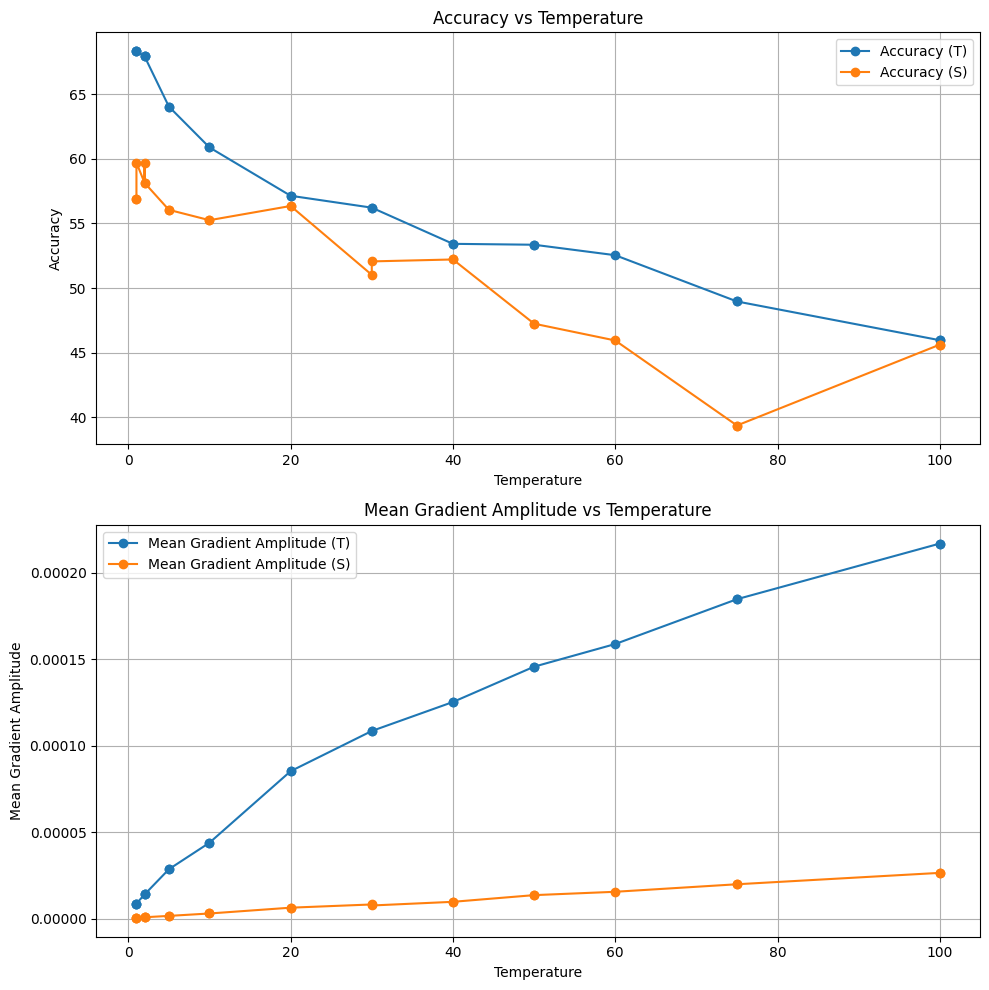

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# -----------------------------
# Subplot 1: Accuracy Metrics
# -----------------------------
ax1.plot(df["Temperature"], df["Accuracy (T)"], label="Accuracy (T)", marker='o')
ax1.plot(df["Temperature"], df["Accuracy (S)"], label="Accuracy (S)", marker='o')
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Accuracy")
ax1.set_title("Accuracy vs Temperature")
ax1.grid(True)
ax1.legend()

# -----------------------------
# Subplot 2: Mean Gradient Amplitude Metrics
# -----------------------------
ax2.plot(df["Temperature"], df["Mean Gradient Amplitude (T)"], label="Mean Gradient Amplitude (T)", marker='o')
ax2.plot(df["Temperature"], df["Mean Gradient Amplitude (S)"], label="Mean Gradient Amplitude (S)", marker='o')
ax2.set_xlabel("Temperature")
ax2.set_ylabel("Mean Gradient Amplitude")
ax2.set_title("Mean Gradient Amplitude vs Temperature")
ax2.grid(True)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [14]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

teacher_eval_cols = [
        "Metrics (JSMA)",
        "Metrics (FGSM)",
        "Metrics (DeepFool)",
        "Metrics (Pixel)"
    ]
student_eval_cols = [
    "Metrics (JSMA) S",
    "Metrics (FGSM) S",
    "Metrics (DeepFool) S",
    "Metrics (Pixel) S"
]

In [ ]:
metric_keys = []
for col in teacher_eval_cols:
    valid_rows = df[col].apply(lambda x: isinstance(x, dict) and bool(x))
    if valid_rows.any():
        sample_dict = df[col][valid_rows].iloc[0]
        metric_keys = list(sample_dict.keys())
        break
    

safe_metric_keys = [re.sub(r'\W+', '_', key).strip('_') for key in metric_keys]


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_grouped = df.groupby("Temperature", as_index=False)[numeric_cols].mean()
df_grouped = df_grouped.sort_values("Temperature")
df = df_grouped  # Use the grouped (averaged) data for plotting.

n_rows = len(metric_keys)
n_cols = len(teacher_eval_cols)

subplot_titles = []
for row_idx, metric in enumerate(metric_keys):
    for col_idx, eval_col in enumerate(teacher_eval_cols):
        subplot_titles.append(f"{eval_col}<br>{metric}")

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=subplot_titles)

custom_columns = ["Epochs", "Learning Rate", "Batch Size", "Accuracy (T)"]
custom_data = df[custom_columns].values

for col_idx, (teach_col, stud_col) in enumerate(zip(teacher_eval_cols, student_eval_cols)):
    for row_idx, (metric, safe_metric) in enumerate(zip(metric_keys, safe_metric_keys)):
        teacher_new_col = f"{teach_col}_{safe_metric}"
        student_new_col = f"{stud_col}_{safe_metric}"
        if teacher_new_col not in df.columns:
            print(f"Column {teacher_new_col} not found in dataframe.")
            continue
        if student_new_col not in df.columns:
            print(f"Column {student_new_col} not found in dataframe.")
            continue
        # Teacher trace (solid line)
        fig.add_trace(
            go.Scatter(
                x=df["Temperature"],
                y=df[teacher_new_col],
                mode='lines',
                name=f"{teach_col} - {metric} (Teacher)",
                customdata=custom_data,
                hovertemplate=(
                    "Temperature: %{x}<br>" +
                    "Metric Value: %{y}<br>" +
                    "Epochs: %{customdata[0]}<br>" +
                    "Learning Rate: %{customdata[1]}<br>" +
                    "Batch Size: %{customdata[2]}<br>" +
                    "Accuracy (T): %{customdata[3]}<extra></extra>"
                ),
                line=dict(dash="solid"),
                showlegend=False
            ),
            row=row_idx+1, col=col_idx+1
        )
        # Student trace (dashed line)
        fig.add_trace(
            go.Scatter(
                x=df["Temperature"],
                y=df[student_new_col],
                mode='lines',
                name=f"{stud_col} - {metric} (Student)",
                customdata=custom_data,
                hovertemplate=(
                    "Temperature: %{x}<br>" +
                    "Metric Value: %{y}<br>" +
                    "Epochs: %{customdata[0]}<br>" +
                    "Learning Rate: %{customdata[1]}<br>" +
                    "Batch Size: %{customdata[2]}<br>" +
                    "Accuracy (T): %{customdata[3]}<extra></extra>"
                ),
                line=dict(dash="dash"),
                showlegend=False
            ),
            row=row_idx+1, col=col_idx+1
        )

fig.update_layout(
    height=300 * n_rows,
    width=350 * n_cols,
)
fig.update_xaxes(title_text="Temperature")

fig.show()